### TensorFlow
    - สร้าง Neural Network Model ดดยใช้ TensorFlow & Keras
    - Dataset : Breast Cancer, 2 Feature
    - Binary Classification

In [1]:
import tensorflow as tf 
tf.__version__

'2.17.0'

In [2]:
from sklearn.datasets import load_breast_cancer 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer.target[40:50]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [8]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2]) # 2 Features

# df = pd.DataFrame(cancer.data[:,0:4], columns=cancer.feature_names[0:4]) # 4 Features

df['class'] = cancer.target

df.sample(5, random_state=1)

df.tail()

,mean radius,mean texture,class
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0
568,7.76,24.54,1


In [9]:
df.describe().round(2)

,mean radius,mean texture,class
count,569.00,569.00,569.00
mean,14.13,19.29,0.63
std,3.52,4.30,0.48
min,6.98,9.71,0.00
25%,11.70,16.17,0.00
50%,13.37,18.84,1.00
75%,15.78,21.80,1.00
max,28.11,39.28,1.00


In [10]:
df.groupby('class').count()

,mean radius,mean texture
class,,
0,212,212
1,357,357


In [11]:
# df['class'] = np.where(df['class']==0, 'yes', 'no')
# df['class'] = np.where(df['class']==0, 'malignant', 'benign')

target_map = {0:'malignant', 1:'benign'} # ได้ผลลัพธ์เหมือนด้านบน
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=1)

,mean radius,mean texture,class
421,14.69,13.98,benign
47,13.17,18.66,malignant
292,12.95,16.02,benign
186,18.31,18.58,malignant
414,15.13,29.81,malignant


In [12]:
df.head()

,mean radius,mean texture,class
0,17.99,10.38,malignant
1,20.57,17.77,malignant
2,19.69,21.25,malignant
3,11.42,20.38,malignant
4,20.29,14.34,malignant


In [13]:
df.tail()

,mean radius,mean texture,class
564,21.56,22.39,malignant
565,20.13,28.25,malignant
566,16.60,28.08,malignant
567,20.60,29.33,malignant
568,7.76,24.54,benign


In [14]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

### Data Visualization

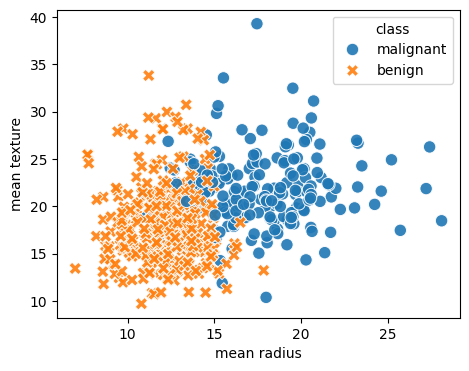

In [15]:
plt.figure(figsize=(5.2,4))

sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.show()

### X and y

In [16]:
X = df.drop('class', axis=1)
X.head()
X.tail()

,mean radius,mean texture
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33
568,7.76,24.54


In [17]:
# if label Encoding, skip this command
y = df['class'] # กรณี: ไม่ทำ Label Encoding.

In [18]:
y[:15]

0     malignant
1     malignant
2     malignant
3     malignant
4     malignant
5     malignant
6     malignant
7     malignant
8     malignant
9     malignant
10    malignant
11    malignant
12    malignant
13    malignant
14    malignant
Name: class, dtype: object

In [19]:
np.unique(y)

array(['benign', 'malignant'], dtype=object)

### Feature Scaling using StandardScaler

In [20]:
from sklearn.preprocessing import  StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

In [21]:
cancer.feature_names[0:2]

array(['mean radius', 'mean texture'], dtype='<U23')

In [22]:
dfsc = pd.DataFrame(X_sc, columns=['mean radius', 'mean texture']) #
# dfsc = pd.DataFrame(X_sc, columns=cancer.feature_names[0:2])

dfsc['class'] = y

dfsc.describe().round(3)

,mean radius,mean texture
count,569.000,569.000
mean,-0.000,0.000
std,1.001,1.001
min,-2.030,-2.229
25%,-0.689,-0.726
50%,-0.215,-0.105
75%,0.469,0.584
max,3.971,4.652


In [23]:
dfsc.head()

,mean radius,mean texture,class
0,1.097064,-2.073335,malignant
1,1.829821,-0.353632,malignant
2,1.579888,0.456187,malignant
3,-0.768909,0.253732,malignant
4,1.750297,-1.151816,malignant


### KED plot

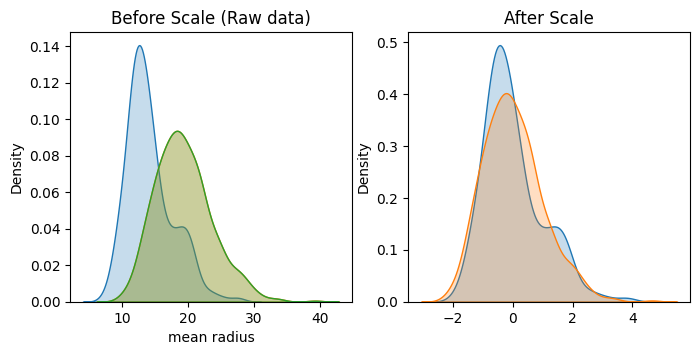

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before Scale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After Scale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()

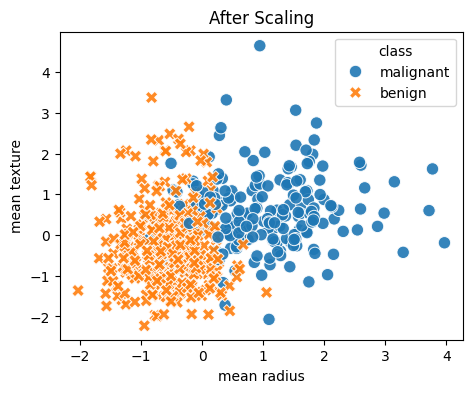

In [25]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=dfsc, hue='class', style='class',
                alpha=0.9, edgecolor='w', s=80)

plt.title('After Scaling')
plt.show()

In [26]:
# plt.scatter(X_sc[:,0][y==0], X_sc[:,1][y==0], marker='o', edgecolors='w', s=60, label='Benign')
# plt.scatter(X_sc[:,0][y==1], X_sc[:,1][y==0], marker='x', s=50, label='Malignant')
# plt.legend()
# plt.show()



### Train-test Split

In [27]:
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

In [28]:
y[:5]

0    malignant
1    malignant
2    malignant
3    malignant
4    malignant
Name: class, dtype: object

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape

((426, 2), (143, 2))

In [30]:
y_train.shape, y_test.shape

((426,), (143,))

In [31]:
X_train.shape, y_test.shape

((426, 2), (143,))

In [32]:
X_train[:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [33]:
y_train[:5]

562    malignant
291       benign
16     malignant
546       benign
293       benign
Name: class, dtype: object

In [34]:
### Training set (class 0 & 1)
print('Train; Class 0:', len(y_train[y_train==0]))
print('Train; Class 1:', len(y_train[y_train==1]))
print('Total:', len(y_train))

Train; Class 0: 0
Train; Class 1: 0
Total: 426


### Model

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [36]:
X_train.shape

(426, 2)

In [37]:
input_size = X_train.shape[-1] #input size for nueral network
input_size

2

### Create a Model

In [38]:
#Sequential Model using Input
model = Sequential()

#model.add(Input(shape=(2,)))
model.add(Input(shape=(input_size,)))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [39]:
# Sequential Model (ไม่ใช้ Input แต่กำหนดที่ Dense Layer)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(2,)))
# model.add(Dense(32, activation='relu, input_shape=(input_size,)))

model.add(Dense(1, activation='sigmoid'))

c:\Users\araya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Info

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.output_shape

(None, 1)

In [42]:
model.get_config()

{'name': 'sequential_1',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_1'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regul

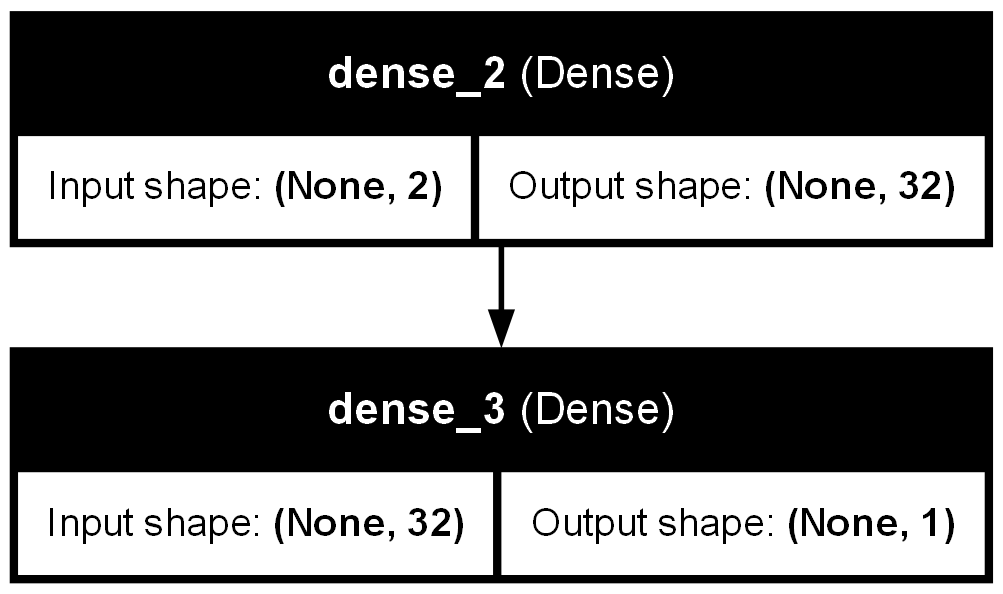

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)